In [357]:

#S4- CASO PRACTICO-BDD FINAL

#Elaborado por Jheremy Ron

#Importe la base de datos a una base en Jupyter Notebook con pandas.
#Evalúe si la base contiene datos perdidos.

#No posee valores perdidos

#Evalúe si alguna de las variables contiene datos atípicos (outliers) 

#Contiene valores atípicos en weekly_Sales, y se corrige a través de la mediana.

#De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 

#Grafique las distribuciones de las variables y a priori comente sobre ellas. 

#Realizado

#Obtenga las correlaciones entre los datos de corte numérico. 

#Realizado

#Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

#Variable Dependiente: Weekly_Sales

#Indique que tipo de modelación realizarán y porqué. 

#Regresión Lineal Multiple

#Verifique los supuestos, de haber escogido el enfoque econométrico. 
#Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.
#R2 apegado a -1 lo que explica que el modelo es tiene relación en sus variables
#Grafique a los valores predicho de modelo vs los valores reales.
#Realizado
#¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 
#Existe similitud con los valores reales
#Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.
#R2 es importante que esté apegado a 1 o a -1, mientras más cercano a 0 significa que el modelo no es significativo
#Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma. 


In [358]:
#Importe la base de datos a una base en Jupyter Notebook con pandas.

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [360]:
!pip install linearmodels

In [361]:
#Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

#La variable fecha no está en formato date, sinó como objeto.

In [362]:
df = pd.read_csv('C:/Users/jhere/Downloads/Walmart(1).csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [363]:
data_NaN = df.isnull().sum()
print(data_NaN)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [364]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [365]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [366]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

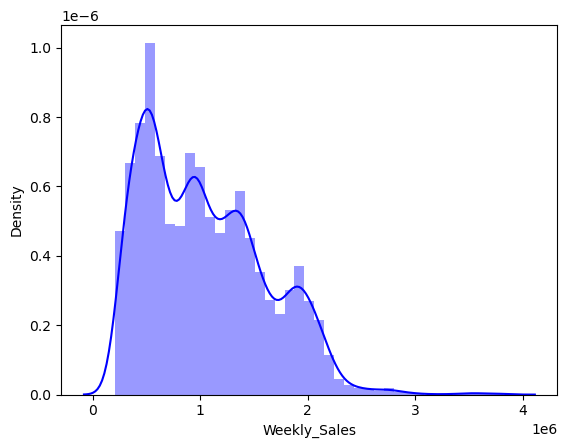

In [367]:
sns.distplot(df['Weekly_Sales'],color="blue")

<Axes: xlabel='Fuel_Price', ylabel='Density'>

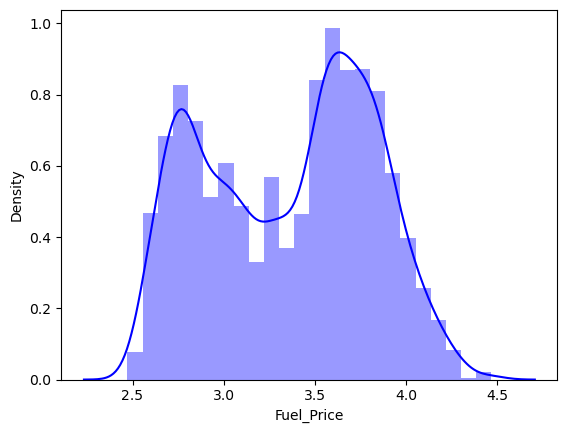

In [368]:
sns.distplot(df['Fuel_Price'],color="blue")

<Axes: xlabel='Temperature', ylabel='Density'>

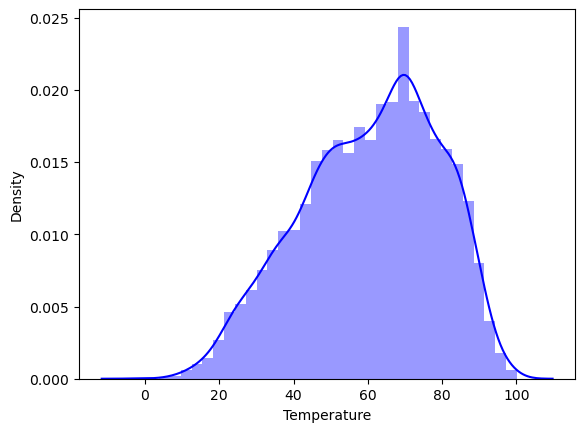

In [369]:
sns.distplot(df['Temperature'],color="blue")

<Axes: xlabel='CPI', ylabel='Density'>

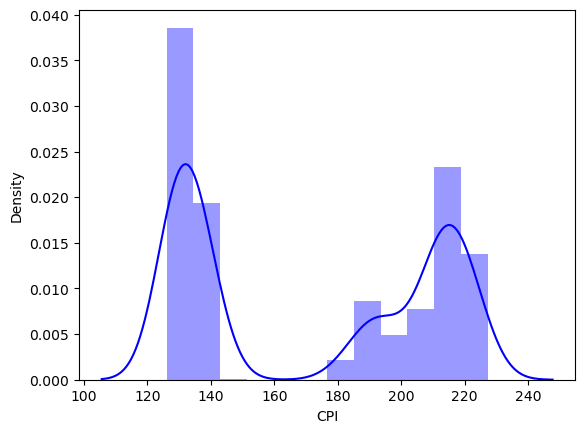

In [370]:
sns.distplot(df['CPI'],color="blue")

<Axes: xlabel='Unemployment', ylabel='Density'>

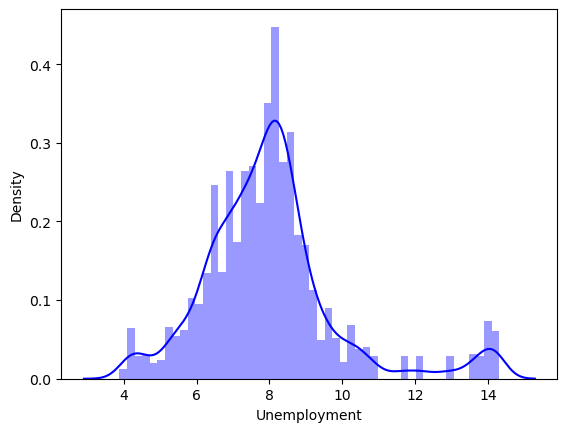

In [371]:
sns.distplot(df['Unemployment'],color="blue")

In [372]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [373]:
mediana_Weekly_Sales = df['Weekly_Sales'].median()
mediana_Temperature= df['Temperature'].median()
mediana_Fuel_Price = df['Fuel_Price'].median()
mediana_CPI = df['CPI'].median()
mediana_Unemployment = df['Unemployment'].median()

In [374]:
df['Weekly_Sales'].fillna(mediana_Weekly_Sales, inplace=True)
df['Temperature'].fillna(mediana_Temperature, inplace=True)
df['Fuel_Price'].fillna(mediana_Fuel_Price, inplace=True)
df['CPI'].fillna(mediana_CPI, inplace=True)
df['Unemployment'].fillna(mediana_Unemployment, inplace=True)

In [375]:
data_perdidos = df.isnull().sum()
print(data_perdidos)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [376]:
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
RIQ = Q3 - Q1
#rango intercuartilico
print(RIQ)

866808.5549999999


In [377]:
data = df[~((df['Weekly_Sales']<(Q1 -1.5* RIQ))|(df['Weekly_Sales']>(Q3 +1.5* RIQ)))]
df.shape

(6435, 8)

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

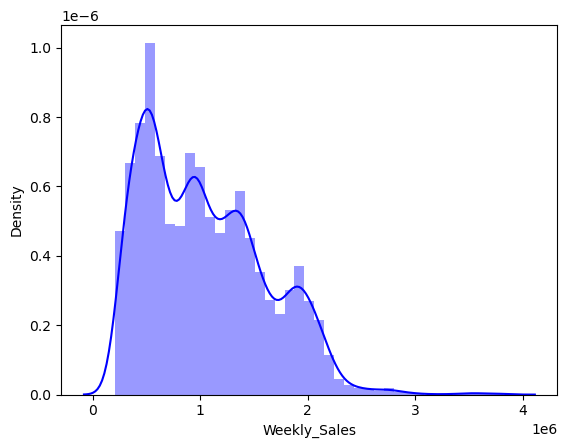

In [378]:
sns.distplot(df['Weekly_Sales'],color="blue")

In [379]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [380]:
from sklearn.preprocessing import LabelEncoder

In [381]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [382]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [383]:
df.dtypes

Store             int64
Date              int32
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [384]:
from sklearn.preprocessing import LabelEncoder

# Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Codifica las columnas categóricas
df['Store'] = label_encoder.fit_transform(df['Store'])
df['Holiday_Flag'] = label_encoder.fit_transform(df['Holiday_Flag'])

# Muestra las primeras filas del DataFrame para verificar los cambios
print(df.head())

   Store  Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      0    19    1643690.90             0        42.31       2.572   
1      0    52    1641957.44             1        38.51       2.548   
2      0    85    1611968.17             0        39.93       2.514   
3      0   118    1409727.59             0        46.63       2.561   
4      0    20    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [385]:
df.corr ().style.background_gradient (cmap = "coolwarm")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.000000,-0.335332,-0.000000,-0.022659,0.060023,-0.209492,0.223531
Date,-0.000000,1.000000,-0.015453,0.045170,0.034668,0.023262,0.002593,-0.004039
Weekly_Sales,-0.335332,-0.015453,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-0.000000,0.045170,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.022659,0.034668,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.060023,0.023262,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.209492,0.002593,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.223531,-0.004039,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


In [386]:
columnas_de_interes = df.drop(['Store', 'Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price'], axis=1) 

# Calcula la matriz de correlación
matriz_correlacion = columnas_de_interes.corr()

# Imprime la matriz de correlación
print("Matriz de correlación:")
print(matriz_correlacion)

Matriz de correlación:
                  Date       CPI  Unemployment
Date          1.000000  0.002593     -0.004039
CPI           0.002593  1.000000     -0.302020
Unemployment -0.004039 -0.302020      1.000000


In [387]:
from sklearn.linear_model import LinearRegression

In [388]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [389]:
from sklearn.preprocessing import LabelEncoder

In [390]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [391]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [392]:
#Escoja su variable objetivo y las variables independientes considerando un enfoque de regresión lineal.
# La variable Sales se considera para la regresión lineal.

In [393]:
X = df[df.columns.difference(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])]
y = df.Weekly_Sales

In [394]:
#Entrene al modelo de regresión lineal por sklearn. 

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
#Realice un train/test split, separando un 90% de los datos para la submuestra de entrenamiento y 10% para la submuestra de prueba. 

In [397]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [398]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5148, 2)  <class 'pandas.core.frame.DataFrame'>
(5148,) 	  <class 'pandas.core.series.Series'>
(1287, 2)  <class 'pandas.core.frame.DataFrame'>
(1287,) 	  <class 'pandas.core.series.Series'>


In [399]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [400]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [401]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [402]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

1.7822079982079263e-20
1.8224700343759774e-20


In [403]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

1.3349936322724262e-10
1.349988901575112e-10


In [404]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

8.797294206239961e-11
8.817081192758718e-11


In [405]:
from sklearn.metrics import r2_score

In [406]:
#Evalúe su modelo. ¿Es este aceptable?, para ello escoja las métricas correspondientes
# Se evalúan variables de precisión
# El R2 se acerca a 1
# El MSE es bajo, no muy cercano a cero y no en extremo lejano lo que califica el modelo como adecuado

In [407]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Supongamos que tienes tus datos X e y preparados

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Definir los hiperparámetros a ajustar
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular el R^2 en los conjuntos de entrenamiento y prueba
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("El R^2 del subconjunto de entrenamiento es:", r2_train)
print("El R^2 del subconjunto de prueba es:", r2_test)

El R^2 del subconjunto de entrenamiento es: 1.0
El R^2 del subconjunto de prueba es: 1.0


In [408]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: -0.96711799179843
El R^2 del subconjunto de prueba es: -0.9892106728727652


In [409]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_)

intercepto: -2.3283064365386963e-10
pendiente: [4.86156564e-13 1.00000000e+00]


In [410]:
#Compare sus predicciones con los datos reales mediante un gráfico. 

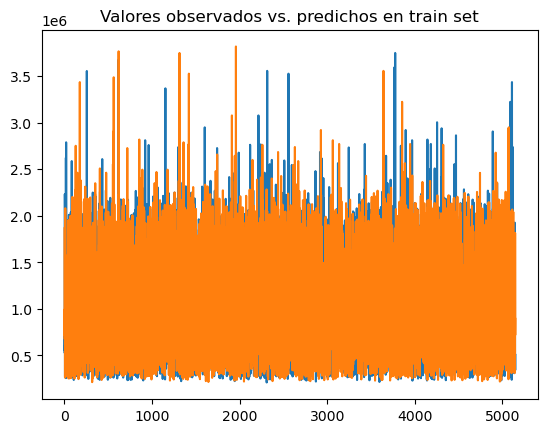

In [411]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

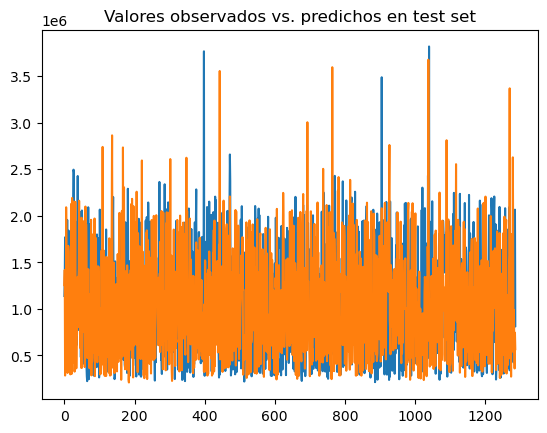

In [412]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [413]:
from sklearn.preprocessing import StandardScaler

In [414]:
sc = StandardScaler()

In [415]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [416]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [417]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [418]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 1.0
El R^2 del subconjunto de prueba es: 1.0


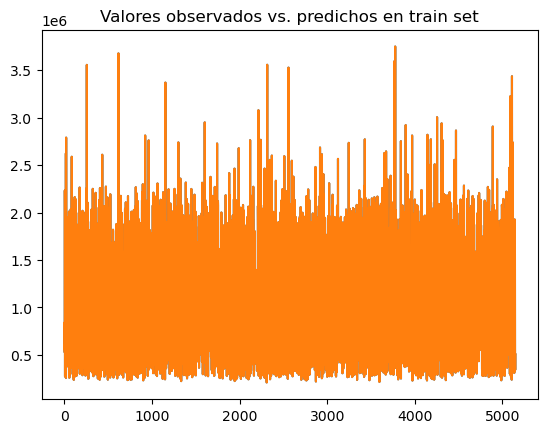

In [419]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

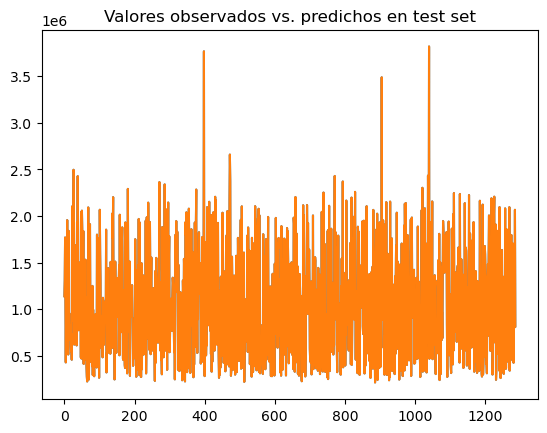

In [420]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [421]:
importancia = modelo_regresion_std.coef_

In [422]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 0.00000
Variable explicativa No. 1, Score: 563486.66279


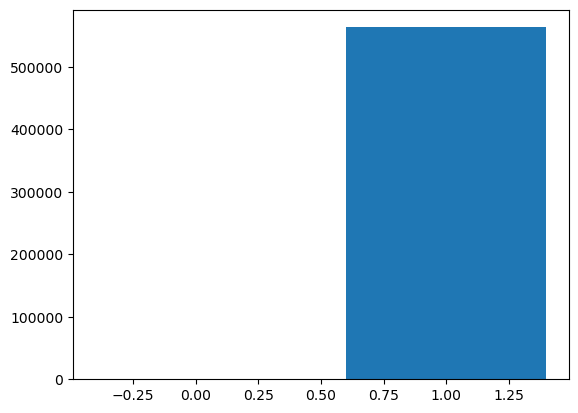

In [423]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

In [424]:
# Obtener los coeficientes del modelo
coefficients = modelo_regresion_std.coef_[0]
 
# Crear un DataFrame para visualizar los coeficientes junto con el nombre de la característica
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
 
# Ordenar los coeficientes por valor absoluto en orden descendente para identificar las variables con mayor poder explicativo
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
 
# Mostrar las 2 variables con mayor poder explicativo
top_features = coef_df_sorted.head(5)
print(top_features)

        Feature  Coefficient
0          Date          0.0
1  Weekly_Sales          0.0
